# Frequent category imputation with Scikit-learn --SimpleImputer

### Datasets:
- House Prices dataset


### Content:

1. Loading Data and Basic Data Exploration.
2. Train/Test splitting.
3. SimpleImputer on the entire dataset.
4. SimpleImputer: different procedures on different features.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to split the datasets
from sklearn.model_selection import train_test_split

### 1. Loading Data and Basic Data Exploration

In [2]:
# load the dataset with a few columns for the demonstration

cols_to_use = ['BsmtQual', 'FireplaceQu', 'MSZoning',
               'BsmtUnfSF', 'LotFrontage', 'MasVnrArea',
               'Street', 'Alley', 'SalePrice']

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 9)


,MSZoning,LotFrontage,Street,Alley,MasVnrArea,BsmtQual,BsmtUnfSF,FireplaceQu,SalePrice
0,RL,65.0,Pave,NaN,196.0,Gd,150,NaN,208500
1,RL,80.0,Pave,NaN,0.0,Gd,284,TA,181500
2,RL,68.0,Pave,NaN,162.0,Gd,434,TA,223500
3,RL,60.0,Pave,NaN,0.0,TA,540,Gd,140000
4,RL,84.0,Pave,NaN,350.0,Gd,490,TA,250000


In [3]:
# check the null values
data.isnull().mean()

MSZoning       0.000000
LotFrontage    0.177397
Street         0.000000
Alley          0.937671
MasVnrArea     0.005479
BsmtQual       0.025342
BsmtUnfSF      0.000000
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

The categorical variables Alley, BsmtQual, and FirePlaceQu contain missing data.

### 2. Train/Test splitting


In [4]:
# train_test_split

# first remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3, 
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 8), (438, 8))

In [5]:
X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
MSZoning       0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
Street         0.000000
Alley          0.939335
dtype: float64

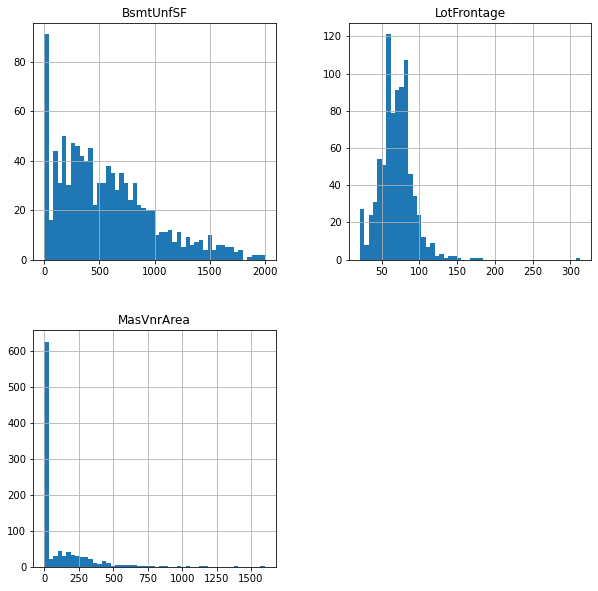

In [6]:
# explore the change in the distributions before the median imputation

X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.hist(bins=50, figsize=(10,10))
plt.show()

### 3. SimpleImputer on the entire dataset

In [7]:
imputer = SimpleImputer(strategy='most_frequent')

# fit the imputer to the whole train set
imputer.fit(X_train[cols_to_use])

SimpleImputer(strategy='most_frequent')

In [8]:
# the learnt frequent values
imputer.statistics_

array(['TA', 'Gd', 'RL', 0, 60.0, 0.0, 'Pave', 'Pave'], dtype=object)

Noted: the transformer learns the most frequent value for both categorical AND numerical variables.

In [9]:
# the mode
X_train[cols_to_use].mode()

,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley
0,TA,Gd,RL,0,60.0,0.0,Pave,Pave


In [10]:
# impute the train and test set
# (returned as a numpy array)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([['Gd', 'Gd', 'RL', ..., 573.0, 'Pave', 'Pave'],
       ['Gd', 'Gd', 'RL', ..., 0.0, 'Pave', 'Pave'],
       ['TA', 'Gd', 'RL', ..., 0.0, 'Pave', 'Pave'],
       ...,
       ['TA', 'Gd', 'RM', ..., 0.0, 'Pave', 'Pave'],
       ['Gd', 'TA', 'RL', ..., 18.0, 'Pave', 'Pave'],
       ['Gd', 'Gd', 'RL', ..., 30.0, 'Pave', 'Pave']], dtype=object)

In [11]:
# encode the train set back to a dataframe

pd.DataFrame(X_train, columns=cols_to_use).head()

,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley
0,Gd,Gd,RL,318,60,573,Pave,Pave
1,Gd,Gd,RL,288,60,0,Pave,Pave
2,TA,Gd,RL,162,50,0,Pave,Pave
3,TA,Gd,RL,356,60,0,Pave,Pave
4,TA,Gd,RL,0,60,0,Pave,Pave


### 4. SimpleImputer: different procedures on different features

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 8), (438, 8))

In [13]:
X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
MSZoning       0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
Street         0.000000
Alley          0.939335
dtype: float64

mpute:

- categorical variables with the frequent category
- numerical variables with the mean.

In [14]:
# lists, indicating which features will be imputed with each method

features_numeric = ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea', ]
features_categoric = ['BsmtQual', 'FireplaceQu', 'MSZoning',
                      'Street', 'Alley']

# put the features list and the transformers together
# using the ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('numeric_imputer', SimpleImputer(strategy='mean'), features_numeric),
    ('categoric_imputer', SimpleImputer(strategy='most_frequent'), features_categoric)
])

In [15]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric_imputer', SimpleImputer(),
                                 ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
                                ('categoric_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['BsmtQual', 'FireplaceQu', 'MSZoning',
                                  'Street', 'Alley'])])

In [16]:
preprocessor.transformers

[('numeric_imputer',
  SimpleImputer(),
  ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
 ('categoric_imputer',
  SimpleImputer(strategy='most_frequent'),
  ['BsmtQual', 'FireplaceQu', 'MSZoning', 'Street', 'Alley'])]

In [17]:
# the mean
preprocessor.named_transformers_['numeric_imputer'].statistics_

array([565.99217221,  69.66866747, 103.55358899])

In [18]:
# the mode 
X_train[features_categoric].mode()

,BsmtQual,FireplaceQu,MSZoning,Street,Alley
0,TA,Gd,RL,Pave,Pave


In [19]:
# mpute the data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [20]:
X_train.shape

(1022, 8)

In [21]:
# capture the data back in a dataframe
pd.DataFrame(X_train,
             columns=features_numeric + features_categoric).head()

,BsmtUnfSF,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,MSZoning,Street,Alley
0,318,69.6687,573,Gd,Gd,RL,Pave,Pave
1,288,69.6687,0,Gd,Gd,RL,Pave,Pave
2,162,50,0,TA,Gd,RL,Pave,Pave
3,356,60,0,TA,Gd,RL,Pave,Pave
4,0,60,0,TA,Gd,RL,Pave,Pave
